In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!iconv -f latin1 -t utf8 test.csv > test_utf8.csv

In [3]:
dataset1 = pd.read_csv('test_utf8.csv')

In [4]:
dataset1 = pd.read_csv('test.csv', encoding='latin1')

In [5]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [6]:
dataset1 = dataset1[:3534]

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 248.6+ KB


In [8]:
dataset1

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [9]:
vocab = sorted(set(dataset1['text']))

In [10]:
print(vocab)

['    - brief interruption- brb. goodnight if i don`t catch u again later. gotta ck something', '    GRR! my stupid meebo is disconnecting me every 5 seconds', '    I am sending healthy, healing thoughts in the mumborg`s direction.', '    eeek!! Your coming!!!! Im soo excited to see you on Thursday!!', '   Awww, that wasn`t very nice.', '   Bummer.  I hope it doesn`t continue too long.', '   But  is right: This is like the Cape Breton coal mines but ++. No lessons learned.', '   But he`s so adorable.', '   Caladesi was definitely a nice peaceful way to spend a Sunday! I got a lil tan!', '   I love you', '   In effect, your podcast IS the audio version of your book. Isn`****? (plus, it has the added charm of banter  )', '   Well....hopefully someday soon you can get one!', '   What are you designing?', '   _coach   IMHO this soft is the best to keep the chaos straight   http://bit.ly/yuFil', '  *shrugs* So do I but it was too funny plus you know you enjoyed it Tweet **** ..   Love you..

In [11]:
from keras.preprocessing.text import Tokenizer

In [12]:
token = Tokenizer()
token.fit_on_texts(vocab)

In [13]:
sequences = token.texts_to_sequences(dataset1['text'] )

In [14]:
l=0
for x in sequences:
    if max(x)>l:
        l=max(x)
print('longest:',l)

longest: 7301


In [15]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Flatten,Softmax,Dropout,BatchNormalization
import tensorflow as tf

In [16]:


def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid()

    # Plot loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid()

    plt.show()

In [17]:
padded_sequences = pad_sequences(sequences,maxlen=32)
labels = np.zeros((3534,3))
print(labels.shape)

(3534, 3)


In [18]:
for i in range(3534):
  if dataset1['sentiment'][i] == 'negative':
    labels[i] = np.array([1,0,0])
  elif dataset1['sentiment'][i] == 'positive':
    labels[i] = np.array([0,0,1])
  elif dataset1['sentiment'][i] == 'neutral':
    labels[i] = np.array([0,1,0])

In [19]:
X_train , X_test , y_train , y_test = train_test_split(padded_sequences,labels,test_size=0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2827, 32)
(707, 32)
(2827, 3)
(707, 3)


In [20]:
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(2827, 32)
(2827, 3)
(707, 32)
(707, 3)


In [21]:
embedding_layer = Embedding(input_dim=7302, output_dim=128, input_length=32)


In [22]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3,activation = 'softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           934656    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 3)                 9

We can see the model overfits as we have just written a normal ann which dont
memorize the outputs.So next we are insert lstm layer to nullify this


Epoch 1/10
71/71 [==============================] - 9s 68ms/step - loss: 1.0883 - accuracy: 0.4016 - val_loss: 1.0813 - val_accuracy: 0.4099
Epoch 2/10
71/71 [==============================] - 4s 51ms/step - loss: 0.9428 - accuracy: 0.5688 - val_loss: 1.1368 - val_accuracy: 0.4311
Epoch 3/10
71/71 [==============================] - 1s 21ms/step - loss: 0.2548 - accuracy: 0.9120 - val_loss: 1.3655 - val_accuracy: 0.4965
Epoch 4/10
71/71 [==============================] - 1s 13ms/step - loss: 0.0262 - accuracy: 0.9943 - val_loss: 1.7329 - val_accuracy: 0.5071
Epoch 5/10
71/71 [==============================] - 1s 11ms/step - loss: 0.0076 - accuracy: 0.9987 - val_loss: 1.8260 - val_accuracy: 0.5053
Epoch 6/10
71/71 [==============================] - 1s 8ms/step - loss: 0.0083 - accuracy: 0.9982 - val_loss: 1.8086 - val_accuracy: 0.5088
Epoch 7/10
71/71 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 1.9726 - val_accuracy: 0.4947
Epoch 8/10
71/7

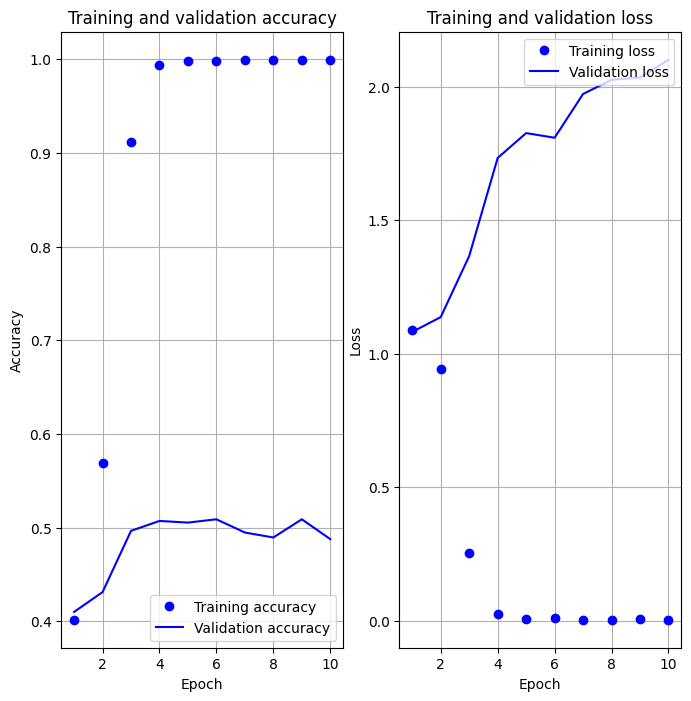

In [24]:
history = model.fit(X_train,y_train, epochs=10, batch_size=32,validation_split=0.2)
plot_history(history)

In [25]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(LSTM(units = 128, return_sequences=False))
#model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(3,activation = 'softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           934656    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                

This model is better than previous one but still not good .
So we will increase the lstm layers for the next model.


Epoch 1/10
71/71 [==============================] - 10s 94ms/step - loss: 1.0908 - accuracy: 0.4193 - val_loss: 1.0850 - val_accuracy: 0.4187
Epoch 2/10
71/71 [==============================] - 3s 49ms/step - loss: 1.0099 - accuracy: 0.4613 - val_loss: 0.9908 - val_accuracy: 0.4912
Epoch 3/10
71/71 [==============================] - 2s 29ms/step - loss: 0.7026 - accuracy: 0.7373 - val_loss: 0.8740 - val_accuracy: 0.6095
Epoch 4/10
71/71 [==============================] - 1s 20ms/step - loss: 0.4531 - accuracy: 0.8487 - val_loss: 0.9729 - val_accuracy: 0.6060
Epoch 5/10
71/71 [==============================] - 1s 13ms/step - loss: 0.3123 - accuracy: 0.8943 - val_loss: 0.9635 - val_accuracy: 0.6272
Epoch 6/10
71/71 [==============================] - 1s 11ms/step - loss: 0.2457 - accuracy: 0.9217 - val_loss: 1.0377 - val_accuracy: 0.6219
Epoch 7/10
71/71 [==============================] - 1s 12ms/step - loss: 0.1730 - accuracy: 0.9434 - val_loss: 1.1528 - val_accuracy: 0.5972
Epoch 8/10
7

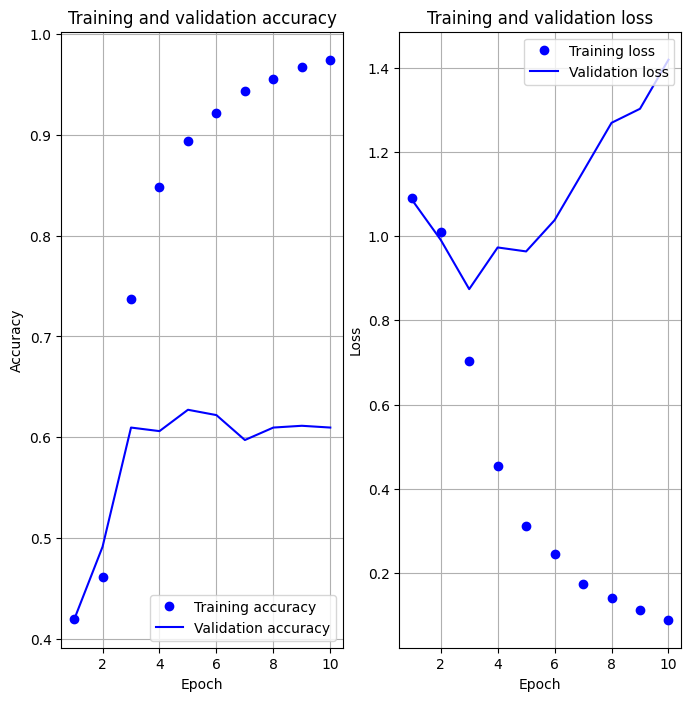

In [27]:
history1 = model1.fit(X_train,y_train, epochs=10, batch_size=32,validation_split=0.2)
plot_history(history1)

In [28]:
from keras.layers import Bidirectional


model2 = Sequential()
model2.add(embedding_layer)
model2.add(Bidirectional(LSTM(units = 128, return_sequences=True)))
model2.add(Dropout(0.2))
model2.add(Bidirectional(LSTM(units = 128, return_sequences=False)))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(3,activation = 'softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 128)           934656    
                                                                 
 bidirectional (Bidirection  (None, 32, 256)           263168    
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 256)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

Epoch 1/10
71/71 [==============================] - 14s 92ms/step - loss: 17.0966 - accuracy: 0.6285 - val_loss: 8.1012 - val_accuracy: 0.6007
Epoch 2/10
71/71 [==============================] - 4s 56ms/step - loss: 3.5863 - accuracy: 0.9040 - val_loss: 1.9626 - val_accuracy: 0.5866
Epoch 3/10
71/71 [==============================] - 2s 28ms/step - loss: 0.9218 - accuracy: 0.9438 - val_loss: 1.4422 - val_accuracy: 0.5866
Epoch 4/10
71/71 [==============================] - 2s 25ms/step - loss: 0.6512 - accuracy: 0.9509 - val_loss: 1.6154 - val_accuracy: 0.5795
Epoch 5/10
71/71 [==============================] - 2s 21ms/step - loss: 0.5427 - accuracy: 0.9628 - val_loss: 1.6964 - val_accuracy: 0.5848
Epoch 6/10
71/71 [==============================] - 1s 18ms/step - loss: 0.6348 - accuracy: 0.9014 - val_loss: 1.6799 - val_accuracy: 0.5583
Epoch 7/10
71/71 [==============================] - 2s 24ms/step - loss: 0.5045 - accuracy: 0.9584 - val_loss: 1.7332 - val_accuracy: 0.5707
Epoch 8/10


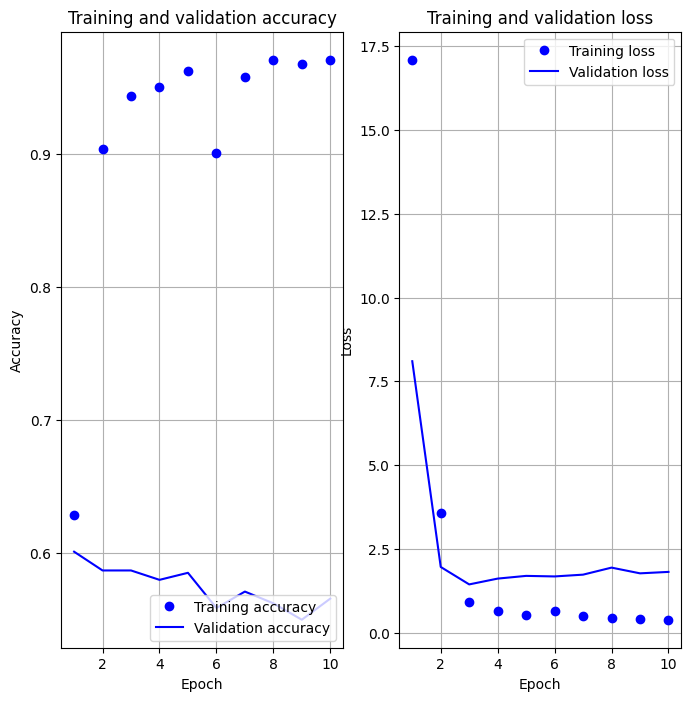

In [30]:
history2 = model2.fit(X_train,y_train, epochs=10, batch_size=32,validation_split=0.2)
plot_history(history2)

#Data Augmentation
I used nltk library for data augmentation by replacing some words in the sentences with sentences and replacing them in sentence.
So just as assumed it gave good results compared to previous datasets.
Overfitting problem was decreased.

In [31]:
#To do dataaugmentation
dataset1

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
import nltk
nltk.data.path.append("/usr/local/lib/python3.10/dist-packages")
from nltk.corpus import wordnet


In [34]:
synonym=[]
for x in wordnet.synsets('good'):
  for i in set(x.lemmas()):
    synonym.append(i.name())


In [35]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
print(word_tokenize(dataset1['text'][0]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Last', 'session', 'of', 'the', 'day', 'http', ':', '//twitpic.com/67ezh']


In [36]:
from nltk.tokenize import word_tokenize
print(word_tokenize(dataset1['text'][0]))

['Last', 'session', 'of', 'the', 'day', 'http', ':', '//twitpic.com/67ezh']


In [37]:
def syn(word):
  synonym=[]
  for x in wordnet.synsets(word):
    for i in set(x.lemmas()):
      if i.name() not in synonym:
       synonym.append(i.name())
  if len(synonym)==0:
    return None
  else:
    return random.choice(synonym)


In [38]:
from numpy import random
def augmentation(data, num_words):
  text=data['text']
  sentiment=data['sentiment']
  X_data=[]
  y_data=[]
  for i in range(len(data)):
    line = text[i]
    line_list = word_tokenize(line)
    for k in range(random.choice(range(num_words))):
     j = random.choice(range(len(line_list)))
     line_list[j] = syn(line_list[j]) if syn(line_list[j]) else line_list[j]
     X_data.append(' '.join(line_list))
     y_data.append(sentiment[i])
  print(len(X_data))
  for x in text:
    X_data.append(x)
  for y in sentiment:
    y_data.append(y)
  print(len(X_data))


  return X_data,y_data



In [39]:
X_total,y_total=augmentation(dataset1,5)

7060
10594


In [40]:
print(len(X_total),len(y_total))

10594 10594


In [41]:
vocab1 = sorted(set(X_total))
token.fit_on_texts(vocab1)

In [42]:
X_total = token.texts_to_sequences(X_total)

In [43]:
l,m=0,0
for x in X_total:
    if len(x)>l:
        l=len(x)
    if max(x)>m:
        m=max(x)
print('biggest:',m)
print('longest:',l)


biggest: 8490
longest: 33


In [44]:
X_total = pad_sequences(X_total,maxlen=l)
labels = np.zeros((len(X_total),3))
print(labels.shape)

(10594, 3)


In [45]:
for i in range(len(X_total)):
  if y_total[i] == 'negative':
    labels[i] = np.array([1,0,0])
  elif y_total[i] == 'positive':
    labels[i] = np.array([0,0,1])
  elif y_total[i] == 'neutral':
    labels[i] = np.array([0,1,0])

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X_total,labels,test_size=0.2)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8475, 33)
(2119, 33)
(8475, 3)
(2119, 3)


In [47]:
y_train = y_train.reshape(-1, 3)
y_test = y_test.reshape(-1, 3)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(8475, 33)
(8475, 3)
(2119, 33)
(2119, 3)


In [48]:
embedding_layer1 = Embedding(input_dim=m+1, output_dim=128, input_length=l)

In [70]:
from keras.layers import Bidirectional


model3 = Sequential()
model3.add(embedding_layer1)
model3.add(Bidirectional(LSTM(units = 128, return_sequences=True)))
model3.add(Dropout(0.2))
model3.add(Bidirectional(LSTM(units = 128, return_sequences=False)))
model3.add(Dropout(0.4))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(3,activation = 'softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), metrics=['accuracy'])

Epoch 1/20
212/212 [==============================] - 23s 66ms/step - loss: 7.3674 - accuracy: 0.9816 - val_loss: 0.7536 - val_accuracy: 0.9044
Epoch 2/20
212/212 [==============================] - 5s 21ms/step - loss: 0.4107 - accuracy: 0.9857 - val_loss: 0.7769 - val_accuracy: 0.8826
Epoch 3/20
212/212 [==============================] - 4s 17ms/step - loss: 0.3154 - accuracy: 0.9917 - val_loss: 0.7520 - val_accuracy: 0.8991
Epoch 4/20
212/212 [==============================] - 4s 21ms/step - loss: 0.2842 - accuracy: 0.9934 - val_loss: 0.8254 - val_accuracy: 0.8914
Epoch 5/20
212/212 [==============================] - 4s 19ms/step - loss: 0.2633 - accuracy: 0.9945 - val_loss: 0.7528 - val_accuracy: 0.9050
Epoch 6/20
212/212 [==============================] - 3s 16ms/step - loss: 0.2574 - accuracy: 0.9923 - val_loss: 0.7885 - val_accuracy: 0.8979
Epoch 7/20
212/212 [==============================] - 3s 16ms/step - loss: 0.2580 - accuracy: 0.9892 - val_loss: 0.6581 - val_accuracy: 0.898

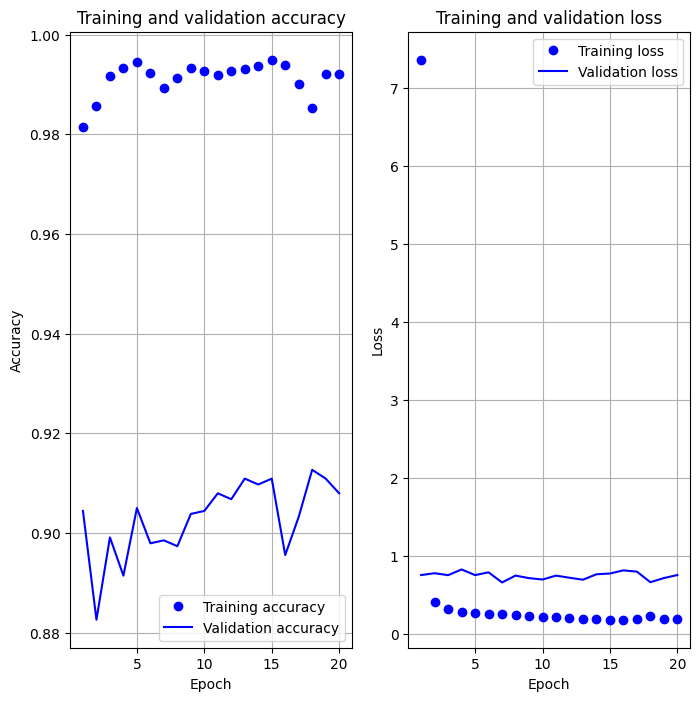

In [71]:
history3 = model3.fit(X_train,y_train, epochs=20, batch_size=32,validation_split=0.2)
plot_history(history3)

In [72]:
y_pred = model3.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
#y_test = np.argmax(y_test, axis=1)


67/67 [==============================] - 2s 5ms/step


In [73]:
# Assume 'y_test' is the actual target values for the test dataset
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9117508258612553


In [74]:
from keras.layers import Bidirectional


model4 = Sequential()
model4.add(embedding_layer1)
model4.add(Bidirectional(LSTM(units = 128, return_sequences=True)))
model4.add(Dropout(0.2))
model4.add(Bidirectional(LSTM(units = 128, return_sequences=False)))
model4.add(Dropout(0.4))
model4.add(Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(Dropout(0.2))
model4.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model4.add(Dropout(0.2))
model4.add(Dense(3,activation = 'softmax'))

# Compile the model
model4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])

Epoch 1/20
212/212 [==============================] - 19s 62ms/step - loss: 24.1327 - accuracy: 0.9063 - val_loss: 20.2972 - val_accuracy: 0.9062
Epoch 2/20
212/212 [==============================] - 6s 26ms/step - loss: 16.5273 - accuracy: 0.9990 - val_loss: 13.7346 - val_accuracy: 0.9127
Epoch 3/20
212/212 [==============================] - 4s 18ms/step - loss: 10.7049 - accuracy: 0.9978 - val_loss: 8.5907 - val_accuracy: 0.9080
Epoch 4/20
212/212 [==============================] - 3s 16ms/step - loss: 6.2868 - accuracy: 0.9997 - val_loss: 4.8279 - val_accuracy: 0.9068
Epoch 5/20
212/212 [==============================] - 4s 18ms/step - loss: 3.2742 - accuracy: 0.9991 - val_loss: 2.4690 - val_accuracy: 0.9074
Epoch 6/20
212/212 [==============================] - 4s 18ms/step - loss: 1.6043 - accuracy: 0.9994 - val_loss: 1.4120 - val_accuracy: 0.9091
Epoch 7/20
212/212 [==============================] - 3s 14ms/step - loss: 0.8965 - accuracy: 0.9994 - val_loss: 0.9648 - val_accuracy: 

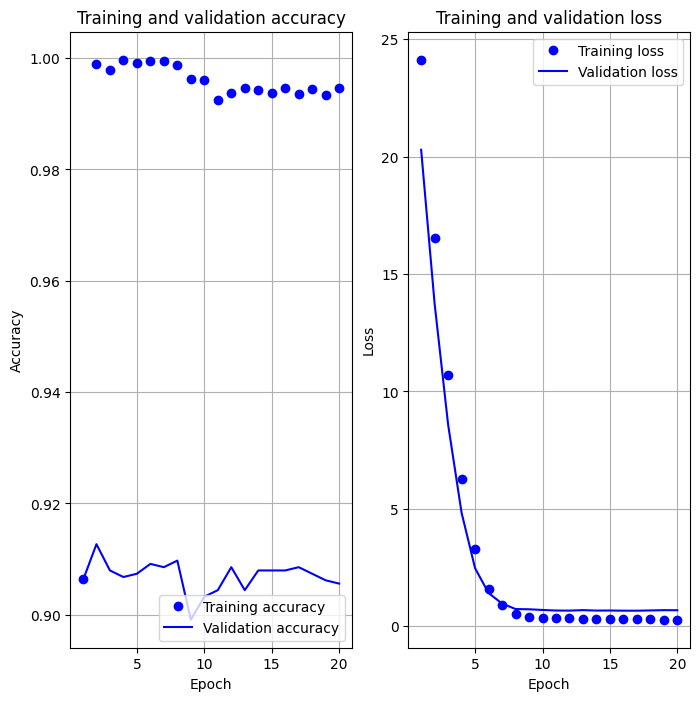

In [75]:
history_4 = model4.fit(X_train,y_train, epochs=20, batch_size=32,validation_split=0.2)
plot_history(history_4)

In [76]:
y_pred1 = model4.predict(X_test)
y_pred1= np.argmax(y_pred1, axis=1)
accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy1)

67/67 [==============================] - 2s 5ms/step
Accuracy: 0.9089193015573384
